<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Runtime        1000 non-null   int64  
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Director       1000 non-null   object 
 6   Star1          1000 non-null   object 
 7   No_of_Votes    1000 non-null   int64  
 8   Gross          1000 non-null   float64
 9   Metascore      843 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 78.2+ KB


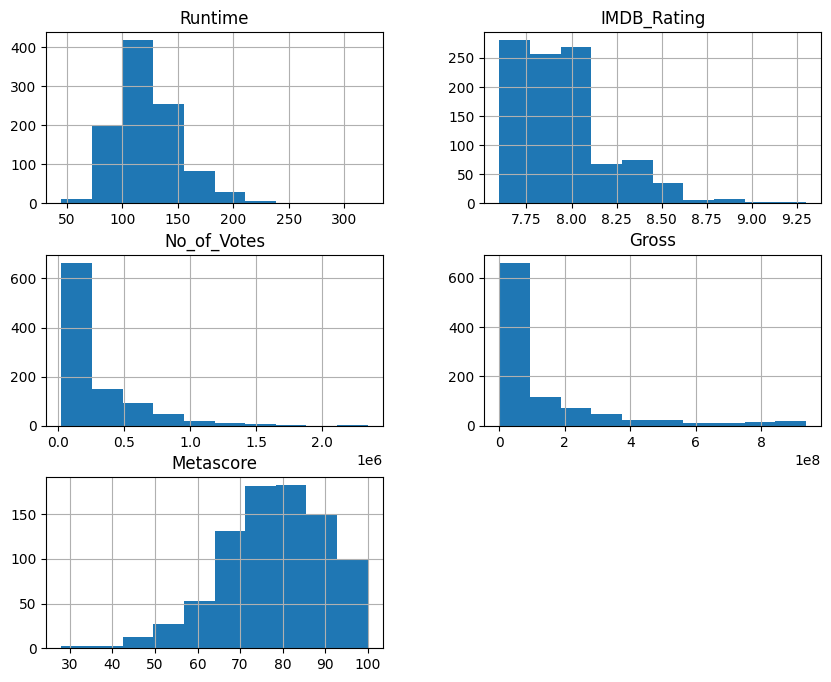

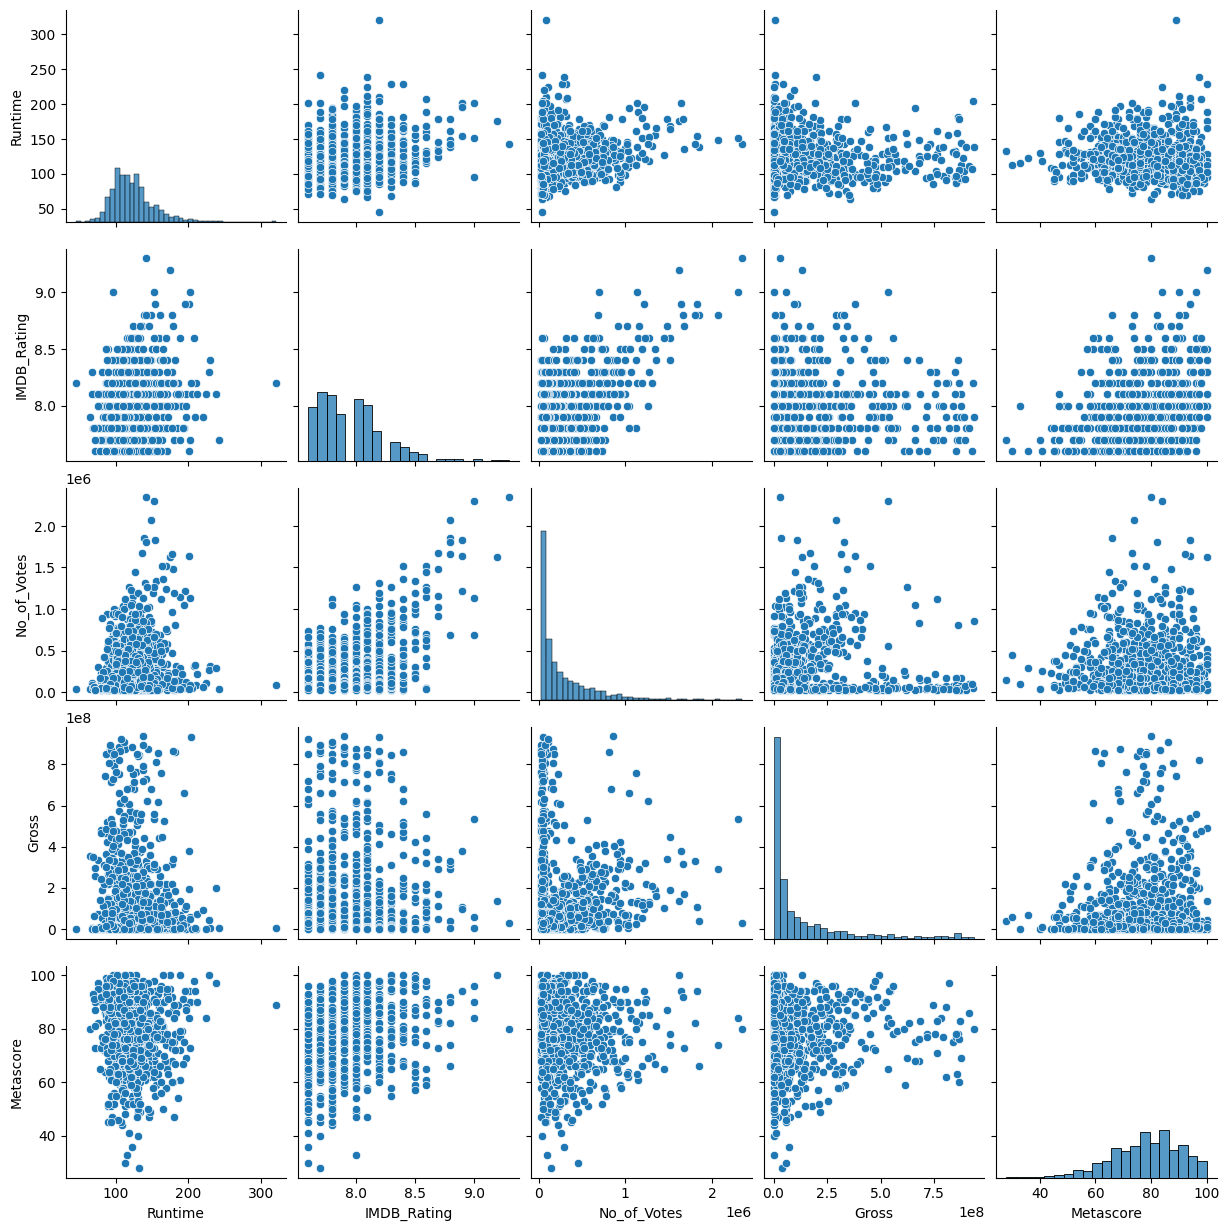

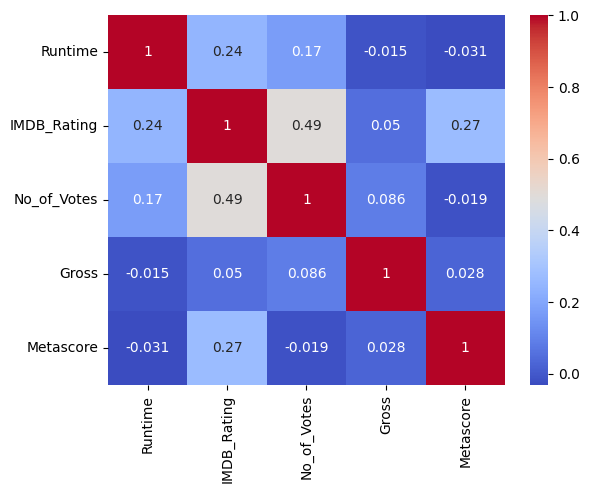

Error Cuadrático Medio (MSE): 0.04899543837911787
Coeficiente de Determinación (R^2): 0.3847156027319768
Valor de la intersección (Intercepto): 7.19783895651966
Coeficientes de las variables independientes: [ 1.37914920e-03  4.00846498e-07 -3.30089731e-11  6.10681547e-03]
     Valor Real  Valor Predicho
521         7.9        7.882525
737         7.7        8.099402
740         7.7        7.922971
660         7.8        7.703590
411         8.0        8.029203
..          ...             ...
468         7.9        7.833650
935         7.6        7.627889
428         8.0        7.836451
7           8.9        8.524044
155         8.2        8.335997

[300 rows x 2 columns]


In [6]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Leer el dataset
data = pd.read_csv('data.csv')

# 1. Descripción de los datos: obtener una visión general
data.info()

# 2. Descripción estadística: estadísticas básicas de las variables numéricas
data.describe()

# 3. Verificar valores nulos
data.isnull().sum()

# 4. Distribución de variables (visualización)
data.hist(figsize=(10, 8))
plt.show()

# Histograma de cada columna numérica
sns.pairplot(data)
plt.show()

# 5. Correlación entre variables numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# 6. Seleccionar columnas para el modelo
X = numeric_data.drop(columns=['IMDB_Rating'])  # Variables independientes
y = numeric_data['IMDB_Rating']  # Variable dependiente

# 7. Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# 8. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 9. Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# 10. Hacer predicciones de prueba
y_pred = model.predict(X_test)

# 11. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

# 12. Mostrar los coeficientes del modelo
print(f"Valor de la intersección (Intercepto): {model.intercept_}")
print(f"Coeficientes de las variables independientes: {model.coef_}")

# 13. Comparar los valores reales con los predichos
comparison = pd.DataFrame({'Valor Real': y_test, 'Valor Predicho': y_pred})
print(comparison)
